In [1]:
import urllib
from bs4 import BeautifulSoup

In [2]:
def parse_report(report_html):
    report = {}
    report_rows = report_html.find_all('tr')
    for row in report_rows:
        row = row.get_text().strip().split(':')
        # If this is the location field, split it apart
        if row[0] == 'Location':
            location = row[1].split(',')
            report.update({'Latitude': float(location[0].replace(' latitude', ''))})
            report.update({'Longitude': float(location[1].replace(' longitude', ''))})
        else:
            report.update({row[0]: row[1]})
    return report

In [11]:
data_url = 'https://aviationweather.gov/airep/data?id=&distance=200&format=decoded&type=&age=1.5&layout=on&date='
req = urllib.request.urlopen(data_url)
html_doc = req.read()
html_doc = html_doc.decode('utf-8')
req.close()

soup = BeautifulSoup(html_doc, 'html.parser')
table_data = soup.find_all('table')

In [12]:
reports = [parse_report(report) for report in table_data]

In [13]:
lats = []
lons = []
sevs = []

for report in reports:
    if report.get('Turbulence'):
        lats.append(report.get('Latitude'))
        lons.append(report.get('Longitude'))
        
        # Parse the turbulence string
        turbulence = report.get('Turbulence').lower()
        
        if 'severe' in turbulence:
            sevs.append(3)
        elif 'moderate' in turbulence:
            sevs.append(2)
        elif 'light' in turbulence:
            sevs.append(1)
        else:
            sevs.append(0)

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

%matplotlib inline

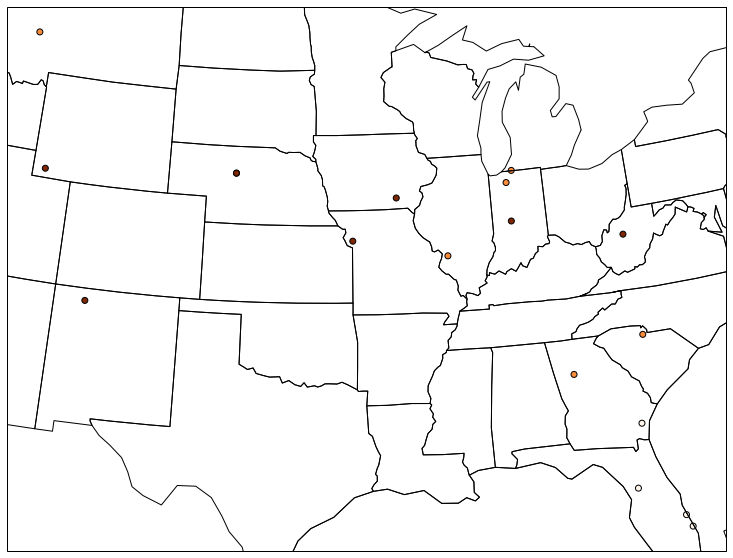

In [15]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.scatter(lons, lats, c=sevs, cmap='Oranges', edgecolor='k', transform=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.STATES)